In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from datetime import datetime



In [2]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (10, 5)
saved_style_state = matplotlib.rcParams.copy()  # give us a style state to go back to

In [3]:
print(os.listdir('.'))
file_path = '1000_richest_people_in_the_world.csv'
data = pd.read_csv(file_path)

['Untitled Folder', 'data_introduction', 'Untitled1.ipynb', 'My data.ipynb', 'Untitled.ipynb', 'README.md', '.gitignore', '1000_richest_people_in_the_world.csv', '.ipynb_checkpoints', '.git']


In [4]:
print(data.dtypes)  

Name                        object
Country                     object
Industry                    object
Net Worth (in billions)    float64
Company                     object
dtype: object


In [5]:
# 检查缺失值
data.isnull().sum()

Name                       0
Country                    0
Industry                   0
Net Worth (in billions)    0
Company                    0
dtype: int64

In [6]:
country_distribution = data['Country'].value_counts()

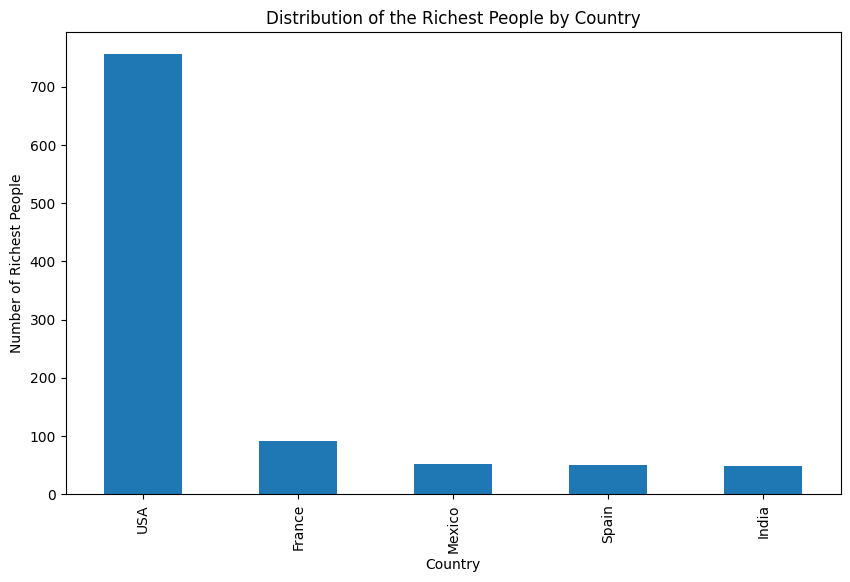

In [7]:
plt.figure(figsize=(10, 6))
country_distribution.plot(kind='bar')
plt.title('Distribution of the Richest People by Country')
plt.xlabel('Country')
plt.ylabel('Number of Richest People')
plt.show()

In [8]:
industry_distribution = data.groupby('Industry').agg(
    count=('Name', 'count'),
    total_net_worth=('Net Worth (in billions)', 'sum')
)

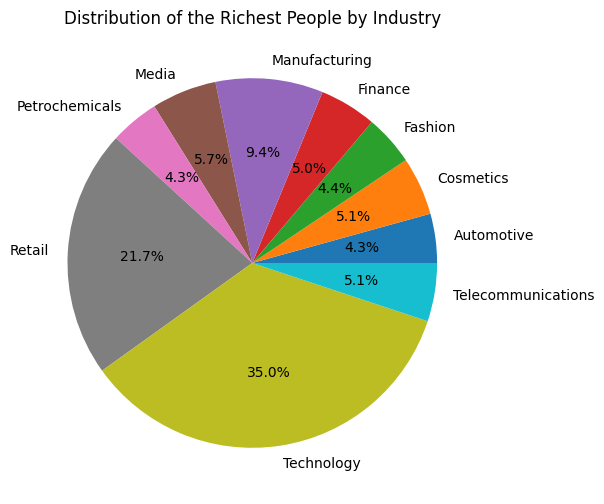

In [9]:
# 绘制行业分布的饼图
plt.figure(figsize=(10, 6))
industry_distribution['count'].plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of the Richest People by Industry')
plt.ylabel('')
plt.show()


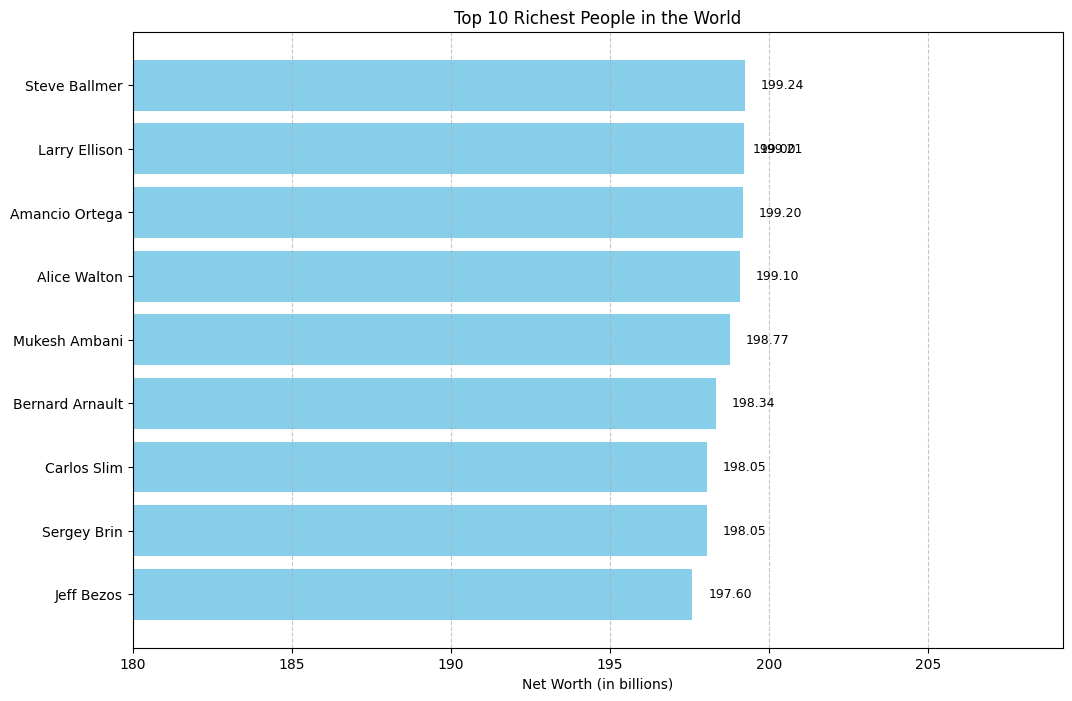

In [15]:
# 修正前十大最富有的人的条形图
top_10_richest = data.sort_values(by='Net Worth (in billions)', ascending=False).head(10)

# 绘制前十大最富有的人的条形图
plt.figure(figsize=(12, 8))
bars = plt.barh(top_10_richest['Name'], top_10_richest['Net Worth (in billions)'], color='skyblue')
plt.xlabel('Net Worth (in billions)')
plt.title('Top 10 Richest People in the World')
plt.gca().invert_yaxis()  # 反转Y轴，使得最富有的人在顶部
plt.grid(axis='x', linestyle='--', alpha=0.7)

# 设置 x 轴范围
plt.xlim(180, max(top_10_richest['Net Worth (in billions)']) + 10)

# 在条形图上添加数据标签
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.5, bar.get_y() + bar.get_height()/2, f'{width:.2f}', 
             va='center', ha='left', color='black', fontsize=9)  # 更小的字体大小

plt.show()